In [1]:
%matplotlib inline
from simulation import *

In [2]:
def findSet2(myG,myCenterNode,myMaxDeg):
    curSet = set()
    curDeg = myMaxDeg
    while(curDeg>0):
        tempoSet = set(findNeighDegN(myG,myCenterNode,curDeg))
        curSet = curSet.union(tempoSet)
        curDeg -= 1
    return curSet

Generating mGraph
----- DONE
Getting layout
----- DONE
Setting default attributes
----- DONE
Choosing the source
----- DONE
Choosing the monitoring nodes
----- DONE
Mlist :  [81, 60, 43, 6, 49, 30, 30, 58, 86, 64] 
Slist :  [88]
Starting infection


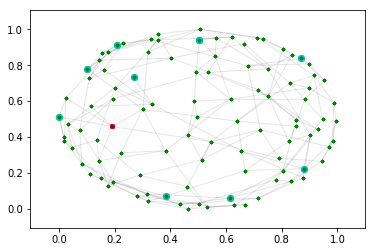

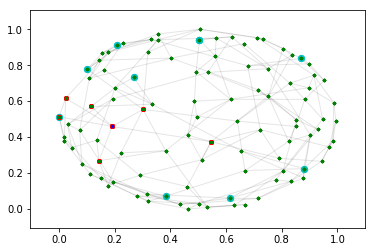

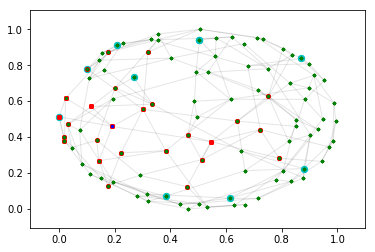

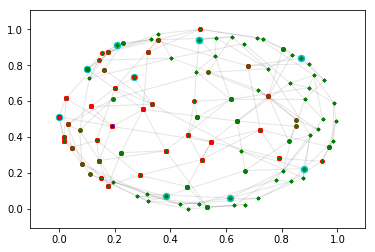

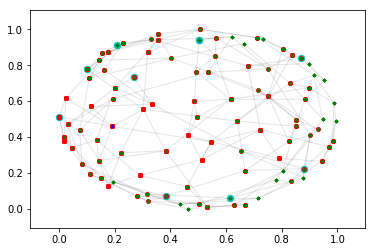

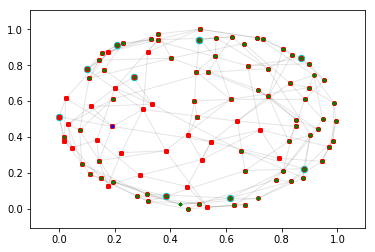

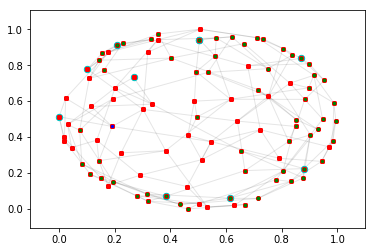

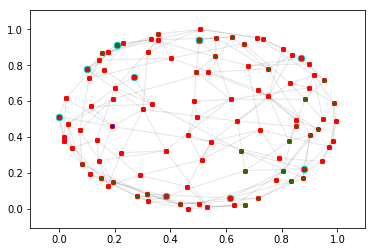

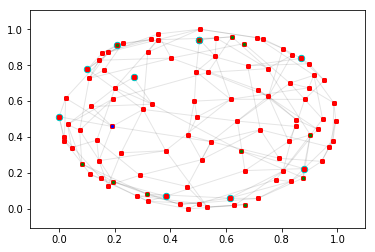

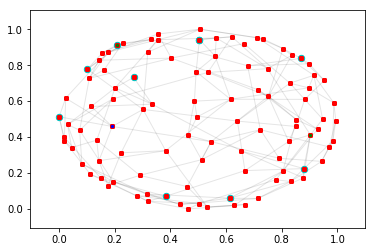

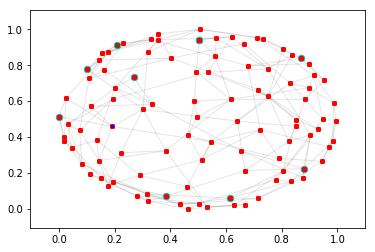

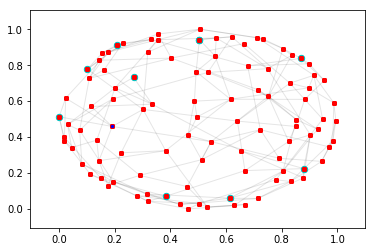

In [3]:
figureList = list()
# Parameters definition
numRumors = 10
maxThreshold = 1
numMonitors = 10
propagProba = 0.5
numNodes = 100
linkProba = 0.2
monitorTrigger = list()
numStep = 100


j=0

Graph, Pos, rumorSources, monitorsList = generateGraphReady(numNodes,linkProba,maxThreshold,numRumors,numMonitors)

fig1 =  drawColoredGraph(Graph, Pos, numRumors, rumorSources, monitorsList)
fig1.savefig('./TestFigs/figT'+str(j)+'.png')

print("Starting infection")
infections = [[] for n in range(numRumors)]

infected = getInfectedList(Graph,numRumors)

while(not isAllInfected(Graph,numRumors)):

    Graph = infectionForward(Graph, propagProba, numRumors)
    infected = getInfectedList(Graph,numRumors)

    # j+1 because j=0 is step 1
    monitorTrigger = updateMonitorTrig(j+1,monitorTrigger,monitorsList,Graph,numRumors)
    j += 1
    fig2 = drawColoredGraph(Graph, Pos, numRumors, rumorSources, monitorsList)
    try:
        fig2.savefig('./TestFigs/figT'+str(j)+'.png')
    except:
        print("BITE")

In [4]:
sets = list()
for i in range(len(monitorTrigger)):
    set1 =findSet(Graph,monitorTrigger[i][0],monitorTrigger[i][2])
    sets.append(set(set1))
    
source = set.intersection(*sets)

try:
    print("Identified Source = ",list(source)[0],"\nReal Source = ",rumorSources[0])
except:
    print("Real Source = ",rumorSources[0])
    print("No sources identified")
    printMonitorTrig(monitorTrigger)
    print('\n\nDifferent sets')
    print(*sets,sep='\n')

Real Source =  88
No sources identified

Monitoring Nodes :
Monitoring node number :  6 
	infected by rumor :  1 	at step :  7
	infected by rumor :  2 	at step :  5
	infected by rumor :  3 	at step :  6
	infected by rumor :  4 	at step :  6
	infected by rumor :  5 	at step :  7
	infected by rumor :  6 	at step :  6
	infected by rumor :  7 	at step :  7
	infected by rumor :  8 	at step :  7
	infected by rumor :  9 	at step :  7
	infected by rumor :  10 	at step :  6
Monitoring node number :  30 
	infected by rumor :  1 	at step :  6
	infected by rumor :  2 	at step :  6
	infected by rumor :  3 	at step :  6
	infected by rumor :  4 	at step :  7
	infected by rumor :  5 	at step :  5
	infected by rumor :  6 	at step :  6
	infected by rumor :  7 	at step :  6
	infected by rumor :  8 	at step :  6
	infected by rumor :  9 	at step :  9
	infected by rumor :  10 	at step :  7
Monitoring node number :  43 
	infected by rumor :  1 	at step :  5
	infected by rumor :  2 	at step :  6
	infected by 

{88}


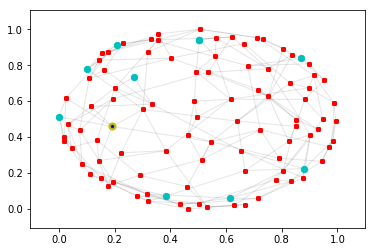

In [ ]:
from networkUtils import drawColoredGraph2

setList = []
for i in monitorTrigger:
    nodeSet = findSet2(Graph,i[0],i[2])
    setList.append(nodeSet)
    
finalSet = set.intersection(*setList)
print("Real Source = ",rumorSources[0])
print("Detected Source = ",list(finalSet))
finalList = list(finalSet)


fig = drawColoredGraph2(Graph,Pos,numRumors,rumorSources,monitorsList,finalList)
fig.savefig('./TestFigs/figEND'+'png')